In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t = pd.read_csv('interaction_separated_coordinates_train.csv')

In [3]:
t.head()

,filename,left1,top1,width1,height1,left2,top2,width2,height2
0,1569527940_01068_1_cropped.jpg,886,85,228,293,1033,4,202,247
1,1569527940_01101_1_cropped.jpg,798,78,326,308,1039,0,205,261
2,1569527940_01105_1_cropped.jpg,799,78,324,309,1027,0,217,262
3,1569527940_01137_1_cropped.jpg,757,79,364,309,1070,2,180,253
4,1569527940_01147_1_cropped.jpg,757,78,364,318,1092,2,165,247


In [4]:
t['right1'] = t['left1']+t['width1']
t['right2'] = t['left2']+t['width2']
t['bottom1'] = t['top1'] + t['height1']
t['bottom2'] = t['top2'] + t['height2']
t['xA'] = t[['left1','left2']].max(axis = 1)
t['yA'] = t[['top1', 'top2']].max(axis=1)
t['xB'] = t[['right1', 'right2']].min(axis = 1)
t['yB'] = t[['bottom1', 'bottom2']].min(axis = 1)
t['inter'] = (t['xB'] - t['xA']) * (t['yB'] - t['yA'])
t['union'] = (t['width1']*t['height1'])+(t['width2']*t['height2'])-t['inter']
t['IOU'] = t['inter'] / t['union']


In [5]:
t.nsmallest(6, 'IOU')

,filename,left1,top1,width1,height1,left2,top2,width2,height2,right1,right2,bottom1,bottom2,xA,yA,xB,yB,inter,union,IOU
111,1573236240_04466_1_cropped.jpg,963,6,274,212,492,433,726,462,1237,1218,218,895,963,433,1218,218,-54825,448325,-0.122289
38,1570028460_03810_1_cropped.jpg,546,125,269,395,815,27,264,304,815,1079,520,331,815,125,815,331,0,186511,0.000000
125,1569175140_03389_1_cropped.jpg,511,171,434,328,695,43,143,142,945,838,499,185,695,171,838,185,2002,160656,0.012461
190,1570737540_03316_1_cropped.jpg,489,271,434,446,813,4,258,300,923,1071,717,304,813,271,923,304,3630,267334,0.013579
52,1570046340_01081_1_cropped.jpg,1110,154,494,388,962,33,167,329,1604,1129,542,362,1110,154,1129,362,3952,242663,0.016286
119,1574074800_03889_1_cropped.jpg,526,106,300,248,427,340,358,301,826,785,354,641,526,340,785,354,3626,178532,0.020310


In [6]:
t.iloc[111:]

,filename,left1,top1,width1,height1,left2,top2,width2,height2,right1,right2,bottom1,bottom2,xA,yA,xB,yB,inter,union,IOU
111,1573236240_04466_1_cropped.jpg,963,6,274,212,492,433,726,462,1237,1218,218,895,963,433,1218,218,-54825,448325,-0.122289
112,1573934400_03325_1_cropped.jpg,851,240,438,308,615,143,303,309,1289,918,548,452,851,240,918,452,14204,214327,0.066273
113,1573934400_03634_1_cropped.jpg,709,238,591,314,750,108,295,169,1300,1045,552,277,750,238,1045,277,11505,223924,0.051379
114,1574074800_03005_1_cropped.jpg,511,248,257,306,570,142,141,133,768,711,554,275,570,248,711,275,3807,93588,0.040678
115,1574074800_03017_1_cropped.jpg,494,251,274,310,565,139,156,161,768,721,561,300,565,251,721,300,7644,102412,0.074640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1574071200_01592_1_cropped.jpg,419,184,396,351,709,129,229,256,815,938,535,385,709,184,815,385,21306,176314,0.120841
258,1574071200_01676_1_cropped.jpg,459,185,304,414,682,161,144,215,763,826,599,376,682,185,763,376,15471,141345,0.109456
259,1574071200_01684_1_cropped.jpg,483,191,278,404,676,162,151,215,761,827,595,377,676,191,761,377,15810,128967,0.122589
260,1574071200_01715_1_cropped.jpg,519,228,265,376,619,173,206,218,784,825,604,391,619,228,784,391,26895,117653,0.228596


(array([0.10268779, 0.        , 0.        , 0.92419009, 4.72363822,
        4.92901379, 5.13438937, 3.28600919, 2.66988247, 1.95106796,
        0.92419009, 0.61612672, 0.61612672, 0.51343894, 0.51343894]),
 array([-0.12228852, -0.0851196 , -0.04795068, -0.01078177,  0.02638715,
         0.06355607,  0.10072499,  0.1378939 ,  0.17506282,  0.21223174,
         0.24940066,  0.28656957,  0.32373849,  0.36090741,  0.39807633,
         0.43524524]),
 <BarContainer object of 15 artists>)

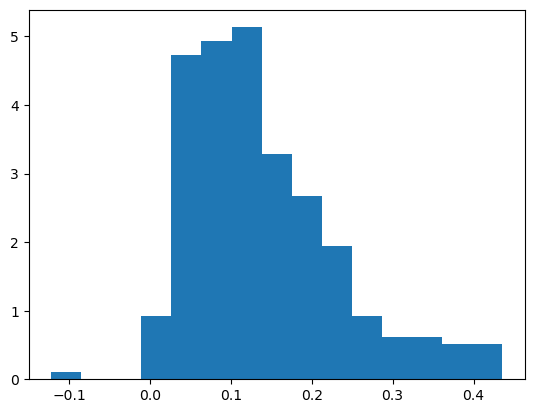

In [12]:
plt.hist(t.IOU, bins = 15, density = True)

In [8]:
u = pd.read_csv('interaction_separated_coordinates_unlabeled.csv')
u['right1'] = u['left1']+u['width1']
u['right2'] = u['left2']+u['width2']
u['bottom1'] = u['top1'] + u['height1']
u['bottom2'] = u['top2'] + u['height2']
u['xA'] = u[['left1','left2']].max(axis = 1)
u['yA'] = u[['top1', 'top2']].max(axis=1)
u['xB'] = u[['right1', 'right2']].min(axis = 1)
u['yB'] = u[['bottom1', 'bottom2']].min(axis = 1)
u['inter'] = (u['xB'] - u['xA']) * (u['yB'] - u['yA'])
u['union'] = (u['width1']*u['height1'])+(u['width2']*u['height2'])-u['inter']
u['IOU'] = u['inter'] / u['union']

<AxesSubplot: xlabel='IOU', ylabel='Density'>

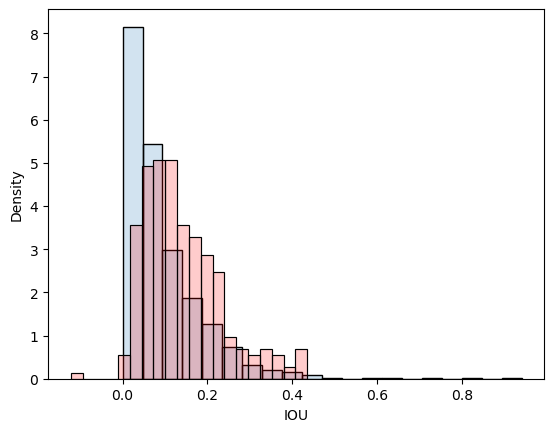

In [29]:
sns.histplot(u.IOU, bins = 20, stat = 'density', alpha = 0.2)
sns.histplot(t.IOU, bins = 20, stat = 'density', alpha = 0.2, color='red')